## MNIST dataset 
<br>
MNIST is a collection of handwritten digits saved in 28-by-28 pixels images. Each image is represented by a 28-by-28 matrix with element values between 0 and 255. The goal of this workbook is to develop a ANN to recognize handwritten digits using image pixel values as input. Similar procedure as in previous XOR example is used to construct ANN, and only the number of input nodes, number of hidden nodes, and number of output nodes are modified.

MNIST dataset can be loaded with keras module. Keras has its API for neural networks related functions, but we will only load the dataset, and implement needed functions from scratch.  

### 1. Load MNIST Dataset

In [28]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [18]:
# check distribution of classes in dataset
from collections import Counter
Counter(y_train)

Counter({0: 5923,
         1: 6742,
         2: 5958,
         3: 6131,
         4: 5842,
         5: 5421,
         6: 5918,
         7: 6265,
         8: 5851,
         9: 5949})

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

# we use sigmoid activation function throughout the workbook
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

### 2. Data Preprocessing

#### Hand Written Digit Examples

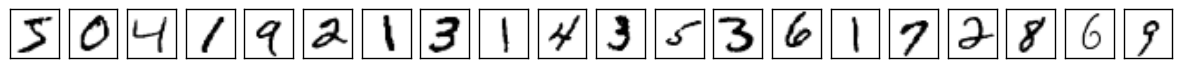

In [20]:
plt.figure(figsize=(15,1)) 

for i in range(20):
    plt.subplot(1, 20, i+1)
    pixels = X_train[i]
    plt.imshow(pixels, cmap='Greys') # plot in grayscale
    # no ticks
    plt.xticks(())
    plt.yticks(())
   
plt.show()

#### Flatten 2D Array and One-Hot Encode Labels

In [21]:
def flatten_and_normalize(matrix):
    """
        Return flattened array for each image with normalized values 
    """
    matrix = matrix / 255.0
    return matrix.reshape(matrix.shape[0], -1)


X_train = flatten_and_normalize(X_train)
y_train = pd.get_dummies(y_train).values

print(y_train[:5]) # first 5 target outputs should represent first 5 images above  

[[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


### 3. Train Neural Network

In [22]:
def forward_propagation(X, W):
    """
    Args 
        X (array): m X n matrix  
                   m is number of observations, n is dimension of input  
        W (array): n X p matrix 
                   n in is dimension of input, p is dimension of output
    Returns
        Output of activation of layer
    """
    return sigmoid(np.dot(X, W))


def back_propagation(diff, A, X):
    """
    Args 
        diff: difference between layer_output and target
        A: layer output 
        X: layer input 
    Returns
        gradient of weights
    """
    delta = diff * A * (1.0 - A) 
    gradient = np.dot(X.T, delta) 
    return gradient


In [23]:
# check dimension of one observation
np.array([X_train[0]]).shape

(1, 784)

#### Batch Gradient Descent

#### Stochastic Gradient Descent 

In [24]:
np.random.seed(0)
epoch = 5
learning_rate = 0.1
hidden_nodes = 200

W1 = 0.01 * np.random.randn(X_train.shape[1], hidden_nodes) # dim (784, N)
W2 = 0.01 * np.random.randn(hidden_nodes, 10) # dim (N, 10)

for i in range(epoch):
    
    # go through all records 
    for X_online, y_online in zip(X_train, y_train):        
                
        X_online = np.array([X_online])
        y_online = np.array([y_online])
        
        # forward propagation 
        z1 = np.dot(X_online, W1)
        a1 = sigmoid(z1)    
        z2 = np.dot(a1, W2)
        a2 = sigmoid(z2) 
                
        # backward propagation 
        d2 = (a2 - y_online) 
        d1 = np.dot(d2, W2.T)
        gradient2 = back_propagation(d2, a2, a1)
        gradient1 = back_propagation(d1, a1, X_online)
        
        # update weights
        W2 -= learning_rate * gradient2
        W1 -= learning_rate * gradient1 
           
    model_output = sigmoid(np.dot(sigmoid(np.dot(X_train, W1)), W2)) 
    loss = np.around(0.5 * np.sum((model_output - y_train)**2) / X_train.shape[0], decimals=5) 
    print("Average squared difference between output and target at epoch {} : {}".format(i + 1, loss))

Average squared difference between output and target at epoch 1 : 0.03954
Average squared difference between output and target at epoch 2 : 0.02623


In [25]:
X_test = flatten_and_normalize(X_test)
predict = np.argmax(sigmoid(np.dot(sigmoid(np.dot(X_test, W1)), W2)), axis=1)
accuracy = 100.0 * sum(predict == y_test) / X_test.shape[0]
print('prediction accuracy: %.2f%%' % round(accuracy, 4))

prediction accuracy: 96.62%


In [27]:
predict[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

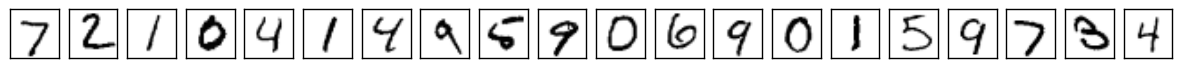

In [29]:
plt.figure(figsize=(15,1)) 

for i in range(20):
    plt.subplot(1, 20, i+1)
    pixels = X_test[i]
    plt.imshow(pixels, cmap='Greys') # plot in grayscale
    # no ticks
    plt.xticks(())
    plt.yticks(())
   
plt.show()